Tamanho do passo calculado: 1.5
Melhor ponto: (1.0, 1.0, 1.0), valor = 0.0
Pior ponto: (10.0, 10.0, -5.0), valor = 1912662.0


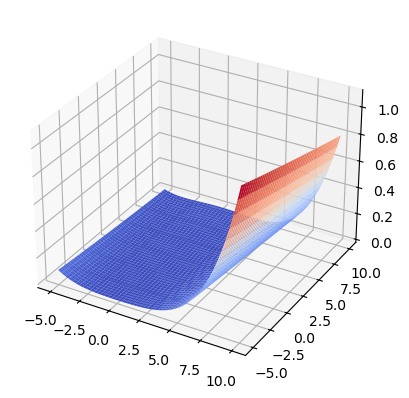

In [3]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Função de Rosenbrock para múltiplas dimensões
def rosenbrock(x):
    x = np.array(x)  # Certificar-se de que x é um array NumPy
    return sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

# Função para calcular o tamanho do passo em múltiplas dimensões
def calcular_tamanho_passo(num_pontos, limite_inferior, limite_superior, dimensao):
    volume_total = (limite_superior - limite_inferior) ** dimensao
    tamanho_passo = (volume_total / num_pontos) ** (1.0 / dimensao)
    return tamanho_passo

# Função de busca sequencial para múltiplas dimensões
def busca_sequencial(dimensao, tamanho_passo, limite_inferior, limite_superior):
    melhor_ponto = None
    melhor_valor = np.inf
    pior_ponto = None
    pior_valor = -np.inf
    melhores_dominios = []
    melhores_imagens = []
    piores_dominios = []
    piores_imagens = []
    imagem = []

    # Gera a lista de valores para cada dimensão com base no tamanho do passo
    ranges = [np.arange(limite_inferior, limite_superior + tamanho_passo, tamanho_passo) for _ in range(dimensao)]

    # Itera por todas as combinações de pontos no espaço de busca usando product
    for ponto in itertools.product(*ranges):
        valor = rosenbrock(ponto)
        if valor < melhor_valor:
            melhor_valor = valor
            melhor_ponto = ponto

        if valor > pior_valor:
            pior_valor = valor
            pior_ponto = ponto

        melhores_dominios.append(melhor_ponto)
        melhores_imagens.append(melhor_valor)
        piores_dominios.append(pior_ponto)
        piores_imagens.append(pior_valor)
        imagem.append(valor)

    return melhor_ponto, melhor_valor, pior_valor, pior_ponto, imagem, melhores_dominios, melhores_imagens, piores_dominios, piores_imagens

# Definir os parâmetros para o domínio [-5, 10] e dimensões desejadas
limite_inferior = -5
limite_superior = 10
num_pontos = 1000
dimensao = 3  # Aumente para o número de dimensões desejado

# Calcular o tamanho do passo para as dimensões especificadas
tamanho_passo = calcular_tamanho_passo(num_pontos, limite_inferior, limite_superior, dimensao)
print(f"Tamanho do passo calculado: {tamanho_passo}")

# Executar a busca sequencial
melhor_ponto, melhor_valor, pior_valor, pior_ponto, imagem, melhores_dominios, melhores_imagens, piores_dominios, piores_imagens = busca_sequencial(
    dimensao, tamanho_passo, limite_inferior, limite_superior
)

# Exibir o melhor resultado
print(f'Melhor ponto: {melhor_ponto}, valor = {melhor_valor}')
print(f'Pior ponto: {pior_ponto}, valor = {pior_valor}')

# Plotar o gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Gerar pontos para o gráfico
x1_v = np.linspace(limite_inferior, limite_superior, 500)
x2_v = np.linspace(limite_inferior, limite_superior, 500)
x1_arr, x2_arr = np.meshgrid(x1_v, x2_v)

# Calcular os valores da função Rosenbrock para plotar
f_arr = np.array([[rosenbrock([x1_, x2_]) for x1_ in x1_v] for x2_ in x2_v])

# Plotar a superfície
surf = ax.plot_surface(x1_arr, x2_arr, f_arr, cmap=plt.cm.coolwarm)
plt.show()

